In [3]:
__author__ = '@Tssp'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['axes.labelsize']=19
plt.rcParams['axes.titlesize']=19

## We have to solve the Schrödinger equation: $$\left(\frac{-\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x)\right)\Psi(x, t) = i\hbar \frac{\partial}{\partial t}\Psi(x, t)$$
## As well as the potential takes this form: $$V(x\in [0, L])= 0$$ $$V(x<0, x>L) = \infty$$
## The general solution can be decomposed as follows:
## $$\Psi(x, t) = \psi(x, 0)e^{-iEt/\hbar}$$
## Where $\psi(x)$ satisfies the next expression: $$\frac{-\hbar^2}{2m}\frac{d^2\psi(x)}{d x^2} = E\psi(x)$$
## Solving this differential equation we obtain the next wavefunctions:
## $$\Psi(x, t) = \sqrt{\left(\frac{2}{L} \right)} \sin{\left(\frac{m\pi}{L}x\right)} e^{-iEt/\hbar}$$

In [4]:
hbar = 1
t = 0
L = 1
x = np.linspace(0, L)
mass = 1

In [5]:
def f(L, m, t, x, mass):
    k = m*np.pi/L
    E = (hbar*k)**2/(2*mass)
    Psi = E/2 + np.sqrt(2/L)*np.sin(m*np.pi*x/L)*np.exp(-1j*E*t/hbar)
    return Psi

In [6]:
def f2(L, m, t, x, mass):
    k = m*np.pi/L
    E = (hbar*k)**2/(2*mass)
    Psi = np.sqrt(2/L)*np.sin(m*np.pi*x/L)*np.exp(-1j*E*t/hbar)
    return E/2 + np.conj(Psi)*Psi

/Users/tomy/Library/Python/3.8/lib/python/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/tomy/Library/Python/3.8/lib/python/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/tomy/Library/Python/3.8/lib/python/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


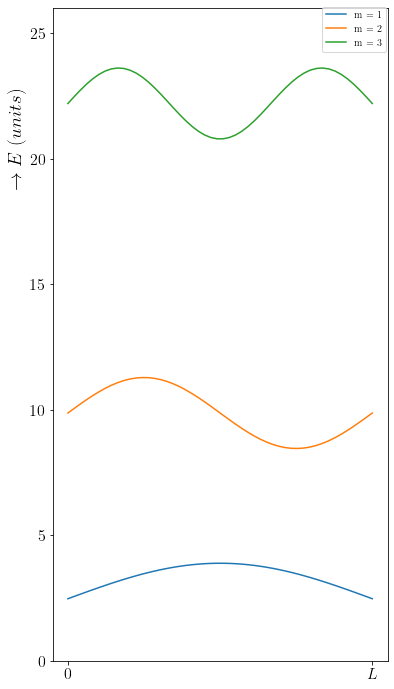

In [7]:
fig, ax = plt.subplots(figsize=(6, 12))
leg = []
for m in range(1, 4):
    plt.plot(x, f(L, m, t, x, mass))
    plt.xlabel('')
    plt.xticks([0, 1], [0, '$L$'])
    plt.ylabel(r'$\rightarrow E\ (units)$', y=0.8)
    plt.ylim([0, 26])
    leg.append('m = {}'.format(m))
plt.legend(leg, bbox_to_anchor=(1.01, 1.01))

In [8]:
def init():
    plt.xlabel('')
    plt.xticks([0, 1], [0, '$L$'])
    plt.ylabel(r'$\rightarrow E\ (units)$', y=0.8)
    plt.ylim([0, 26])
    plt.xlim([0, 1])
    plt.tight_layout()
    return ln,

In [9]:
def update(frame):
    xdata.append(frame)
    ydata = f(L, 1, frame, x, mass)
    ydata2 = f(L, 2, frame, x, mass)
    ydata3 = f(L, 3, frame, x, mass)
    ln.set_data(x, ydata)
    ln2.set_data(x, ydata2)
    ln3.set_data(x, ydata3)
    return ln,

/Users/tomy/Library/Python/3.8/lib/python/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


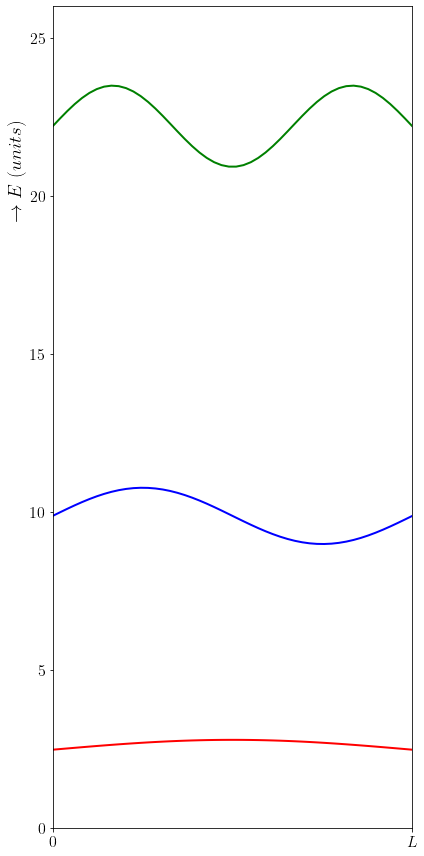

In [12]:
fig, ax = plt.subplots(figsize=(6, 12))
xdata, ydata = [], []
ln, = plt.plot([], [], 'r', lw=2)
ln2, = plt.plot([], [], 'b', lw=2)
ln3, = plt.plot([], [], 'g', lw=2)

ani = animation.FuncAnimation(fig, update, frames=np.linspace(0, 1, 120),
                    init_func=init, blit=True, interval = 100)

ani.save(f'Infinite_well.gif', writer='pillow', dpi=200)
plt.show()